<a href="https://colab.research.google.com/github/wlwlsus/EMG-Machine-Learning/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
import tensorflow as tf
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
start = 25
"""
훈련 파일 작업
"""
# 경로 설정
base_url = '/gdrive/MyDrive/Deu EMG Machine Learning/data/train'
os.chdir(base_url)

# 빈 데이터 배열 생성
train_list = []

total_train = 200

# 1번부터 200번까지 EMG 데이터 호출
for k in range(1,total_train+1):
    train_loc = './EMG_train_'+str(k)+'.csv'
    trains = np.loadtxt(train_loc, delimiter=',', dtype=float)
    train_list.append(trains)

# Numpy로 설정
train_list = np.array(train_list)

#train data
train_datas = train_list[:,start:-1]
train_labels = train_list[:,-1].reshape([len(train_list),1])

# 전체 데이터에서 절반 만큼 '1'로 라벨링 작업
for i in range(100):
    train_labels[i] = np.array([1],dtype=float)

# 결과
print(train_datas.shape)
print(train_labels.shape)

"""
테스트 파일 작업
"""
# 경로 설정
base_url = '/gdrive/MyDrive/Deu EMG Machine Learning/data/test'
os.chdir(base_url)

test_list = []

total_test = 20
# 1번부터 200번까지 EMG 데이터 호출
for k in range(1,total_test+1):
    train_loc = './EMG_test_'+str(k)+'.csv'
    trains = np.loadtxt(train_loc, delimiter=',', dtype=float)
    test_list.append(trains)

# Numpy로 설정
test_list = np.array(test_list)

#train data
test_datas = test_list[:,start:-1]
test_labels = test_list[:,-1].reshape([len(test_list),1])

# 전체 데이터에서 절반 만큼 '1'로 라벨링 작업
for i in range(10):
    test_labels[i] = np.array([1],dtype=float)

# 결과
print(test_datas.shape)
print(test_labels.shape)


(200, 276)
(200, 1)
(20, 276)
(20, 1)


In [ ]:
test_datas[19]

array([130., 128., 128., 128., 132., 129., 117., 132., 128., 128., 127.,
       142., 109., 132., 126., 144., 110., 133., 125., 143., 110., 135.,
       126., 142., 109., 134., 126., 142., 110., 135., 126., 142., 111.,
       133., 126., 143., 109., 134., 126., 141., 111., 133., 126., 142.,
       111., 133., 126., 142., 110., 133., 127., 142., 112., 133., 126.,
       141., 111., 133., 126., 141., 111., 133., 126., 141., 113., 133.,
       126., 143., 109., 134., 126., 141., 112., 133., 126., 142., 111.,
       133., 126., 141., 113., 132., 125., 141., 112., 133., 126., 141.,
       113., 132., 127., 141., 113., 132., 127., 141., 112., 132., 126.,
       141., 112., 132., 126., 141., 112., 133., 126., 143., 110., 134.,
       126., 138., 116., 132., 126., 139., 116., 135., 119., 149., 110.,
       131., 120., 141., 122., 128., 126., 138., 123., 125., 128., 151.,
        96., 136., 127., 129., 141., 111., 133., 129., 129., 122., 129.,
       141., 113., 128., 128., 133., 128., 125., 12

In [ ]:
#  MinMaxScaler 스케일링 진행
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(train_datas)
train_data_minMaxScaled = minMaxScaler.transform(train_datas)


minMaxScaler.fit(test_datas)
test_data_minMaxScaled = minMaxScaler.transform(test_datas)
len(train_data_minMaxScaled)
len(test_data_minMaxScaled)


20

In [ ]:
# 그래프 하나 찍어보기
plt.figure(figsize=(50,10))

font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 28,
        }
plt.ylim(80,180)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
plt.title('EMG Signal',fontdict= font)
plt.xlabel("Time",fontdict=font)
plt.ylabel("EMG Amplitude",fontdict=font)
plt.plot(test_datas[0])

In [ ]:
# 그래프 여러개 모아보기
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }

plt.figure(figsize=(20,20))
for i in range(1,21):
    plt.subplot(5,5,i)
    plt.ylim(80,180)
    # plt.xticks(fontsize=30)
    # plt.yticks(fontsize=30)
    plt.grid()

    plt.title('EMG Signal',fontdict= font)
    plt.xlabel("Time",fontdict=font)
    plt.ylabel("EMG Amplitude",fontdict=font)
    plt.plot(train_datas[i])

In [ ]:
# 모델 생성 메소드
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
        #keras.layers.Dense(len(train_labels), activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

    return model

model = create_model()

In [ ]:
# 훈련단계
history = model.fit(train_data_minMaxScaled, train_labels,validation_split=0.2, epochs=350)

In [ ]:
model.summary()

ValueError: ignored

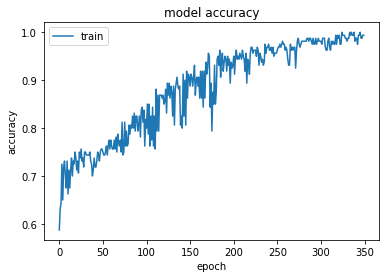

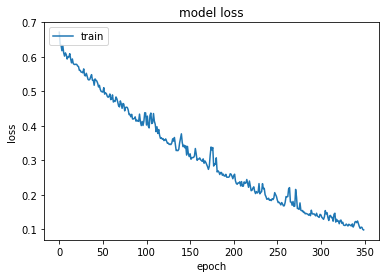

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# 정확도 평가 단계
test_loss, test_acc = model.evaluate(test_data_minMaxScaled,  test_labels, verbose=2)
print('\n정확도 :', str(test_acc * 100)+"%")

1/1 - 0s - loss: 0.7019 - accuracy: 0.5500

정확도 : 55.000001192092896%


In [ ]:
predictions = model.predict(test_datas)

predict_data = test_datas[18]
predict_data2 = test_datas[1]

predict_data = (np.expand_dims(predict_data,0))
predict_data2 = (np.expand_dims(predict_data2,0))


pr = model.predict(predict_data)
pr2 = model.predict(predict_data2)

print(f'테스트 데이터 의 결과 값 : {np.argmax(pr[0])}')
print(f'테스트 데이터 의 결과 값 : {np.argmax(pr2[0])}')

테스트 데이터 의 결과 값 : 0
테스트 데이터 의 결과 값 : 0


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open('/gdrive/MyDrive/Deu EMG Machine Learning/emg.tflite','wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpp8uzfw9e/assets


INFO:tensorflow:Assets written to: /tmp/tmpp8uzfw9e/assets


143732